In [2]:
pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 4.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=ac5315a9ad5d58ffa6c1fc367edaf722df1476235fb3eca4d4cc374cbde998bf
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [3]:
pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 83.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.9/722.9 kB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.0/119.0 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.9/194.9 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE
import matplotlib.pyplot as plt
import mlflow
import shap

In [5]:
#@title Load dataset
data = pd.read_csv('diabetes.csv')
data

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              1       88             62           24.0     21.0  29.9   
1             12       84             72           31.0      7.0  29.7   
2              3       82             70           23.0      8.0  25.0   
3              1       81             72           18.0      8.0  26.6   
4              1       88             62           24.0     21.0  29.9   
..           ...      ...            ...            ...      ...   ...   
763           12      140             82           43.0     16.0  30.0   
764            1      112             80           45.0     24.0  30.0   
765            0      126             84           29.0     25.0  30.0   
766            0      140             65           26.0     24.0  30.0   
767            5      121             72           23.0      7.0  26.2   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.422   23        0  
1                       0.297   46        0  
2                       0.389   25        0  
3                       0.283   24        0  
4                       0.422   23        0  
..                        ...  ...      ...  
763                     0.528   58        1  
764                     0.217   24        1  
765                     0.520   24        1  
766                     0.431   24        1  
767                     0.245   30        1  

[768 rows x 9 columns]

In [6]:
#@title Data profiling
import ydata_profiling as pp
profile = pp.ProfileReport(data)
profile.to_file("outputr.html")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 9/9 [00:00<00:00, 116.01it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
#@title Statistik dasar
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.523438  109.707031      70.580729      25.368490   15.996094   
std       3.189287   29.553855      10.541839       8.801055    6.191742   
min       0.000000   56.000000      60.000000      10.000000    6.000000   
25%       1.000000   89.000000      60.000000      21.000000   10.000000   
50%       2.000000   99.000000      68.000000      23.000000   16.000000   
75%       5.000000  126.000000      78.000000      30.000000   22.000000   
max      17.000000  199.000000     122.000000      99.000000   27.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    27.761458                  0.378868   30.748698    0.500000  
std      2.281660                  0.229408   10.940070    0.500326  
min     25.000000                  0.084000   21.000000    0.000000  
25%     25.000000                  0.223000   22.000000    0.000000  
50%     28.700000                  0.304000   26.000000    0.500000  
75%     30.000000                  0.482000   36.000000    1.000000  
max     30.000000                  1.000000   81.000000    1.000000

In [8]:
#@title Cek missing vaue
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
#@title Feature Engineering
# contoh sederhana: rasio antara Glucose dan BMI
data["Glucose_BMI_Ratio"] = data["Glucose"] / (data["BMI"] + 1)

In [10]:
#@title Pisah fitur dan target
X = data[['Glucose', 'Insulin', 'BMI', 'Age']]
y = data['Outcome']

In [11]:
#@title Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
#@title Standarisasi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

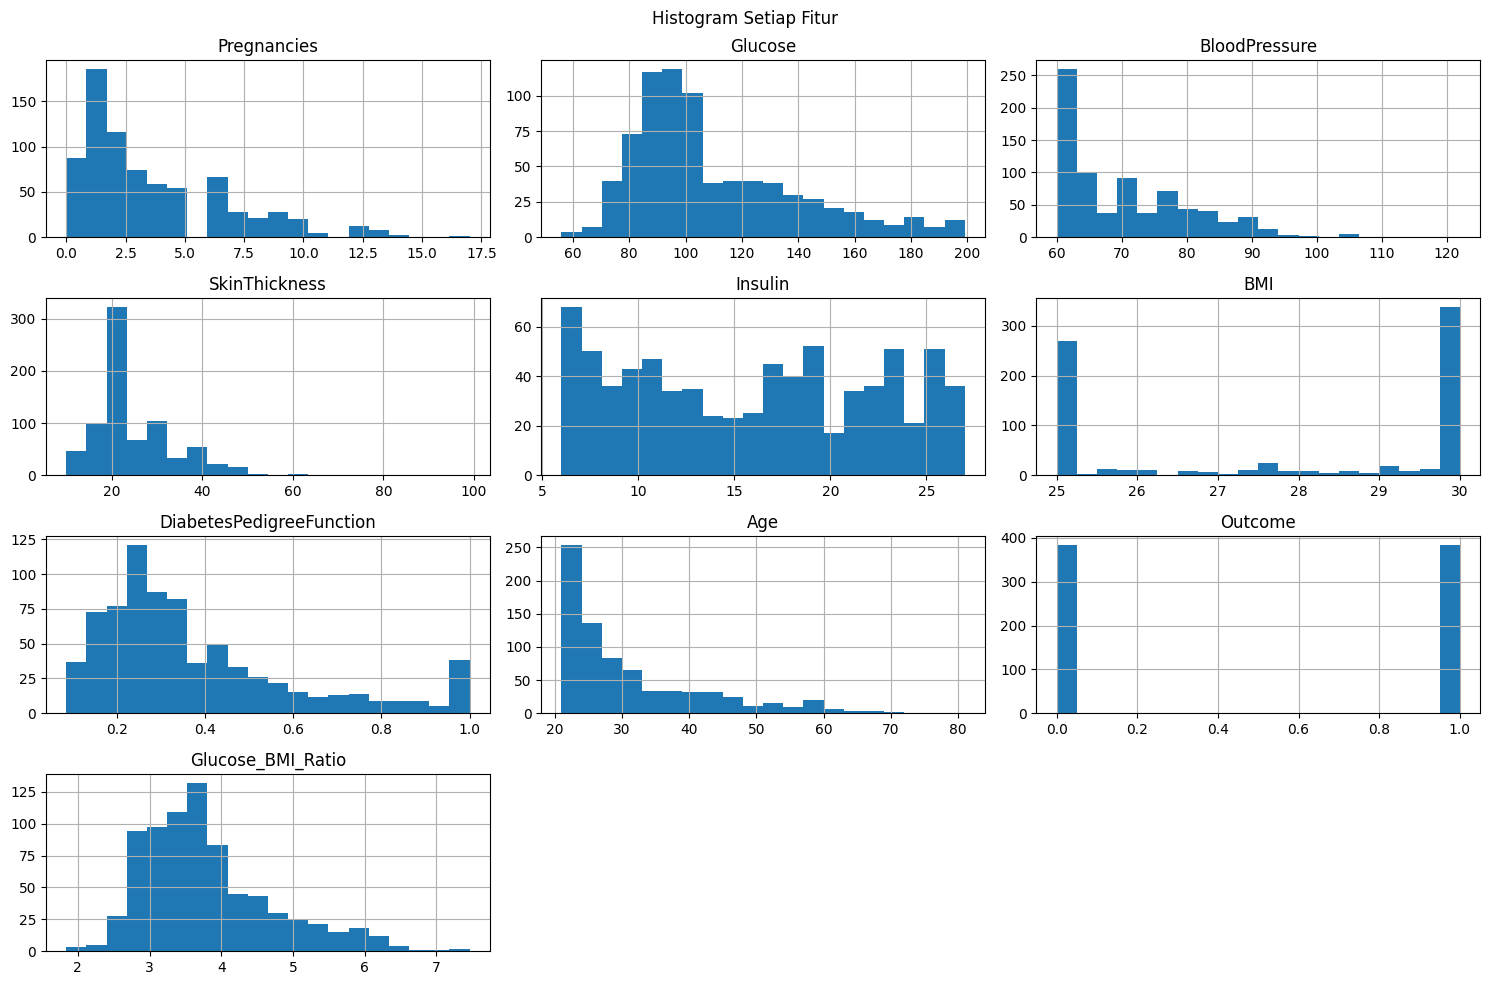

In [13]:
#@title Distribusi fitur numerik
data.hist(bins=20, figsize=(15,10))
plt.suptitle("Histogram Setiap Fitur")
plt.tight_layout()
plt.show()

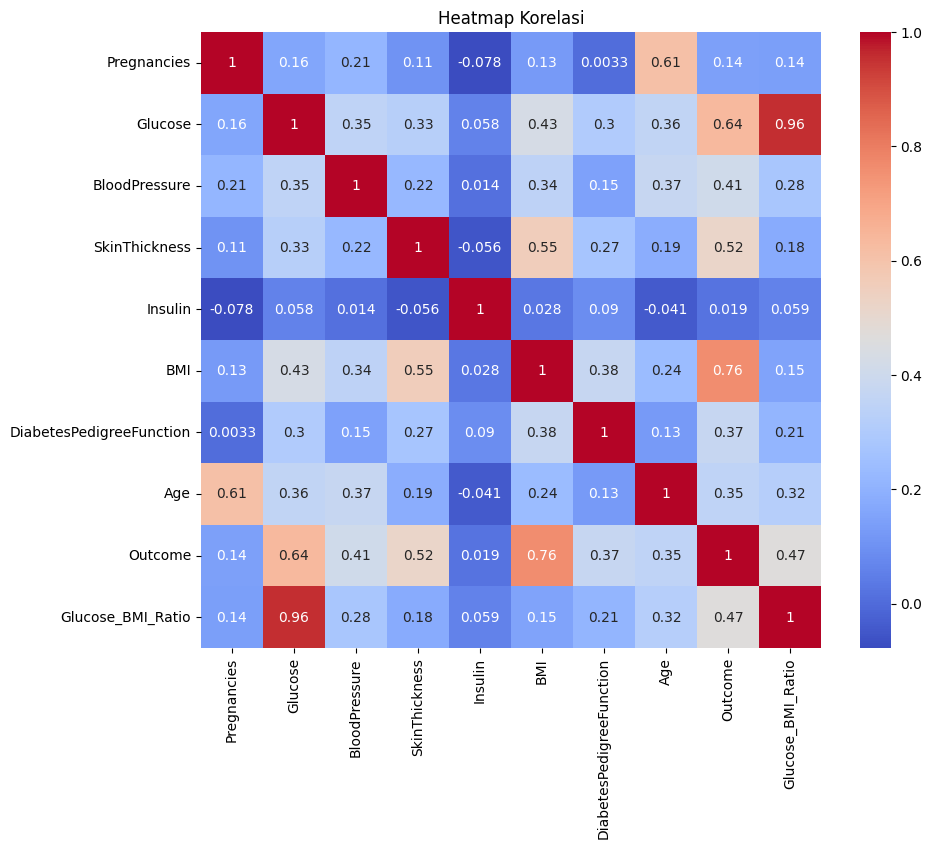

In [14]:
#@title Korelasi antar fitur
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi")
plt.show()

###Model Development and Monitoring (Baseline)

In [15]:
#@title SMOTE untuk penyeimbangan dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

###Fine-Tuning dan Evaluasi Lanjutan

In [16]:
#@title Hyperparameter tuning
param_grid = {'n_estimators': [100, 200, 300, 500],
              'max_depth': [10, 15, 20, 25],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'bootstrap': [True, False]}

In [17]:
#@title Menentukan GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1)

grid_search.fit(X_resampled, y_resampled)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 15, 20, 25],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 500]},
             scoring='accuracy')

In [20]:
#@title Evaluasi Model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Best Accuracy: {:.2f}%".format(accuracy * 100))
print("Best Parameters:", grid_search.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Best Accuracy: 98.70%
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        80
           1       0.99      0.99      0.99        74

    accuracy                           0.99       154
   macro avg       0.99      0.99      0.99       154
weighted avg       0.99      0.99      0.99       154



In [21]:
#@title Evaluasi Model
best_model = grid_search.best_estimator_
input_example = np.array([X_train.iloc[0]]).reshape(1, -1)

y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

mlflow.set_experiment("Random-Forest-Diabetes")

with mlflow.start_run():
    mlflow.log_param("model", "Random Forest")
    mlflow.log_param("n_estimators", grid_search.best_params_['n_estimators'])
    mlflow.log_param("max_depth", grid_search.best_params_['max_depth'])
    mlflow.log_metric("accuracy", accuracy)

    mlflow.sklearn.log_model(best_model, "model", input_example=input_example)

    print("Best Accuracy: {:.2f}%".format(accuracy * 100))
    print("Best Parameters:", grid_search.best_params_)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

Best Accuracy: 98.70%
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        80
           1       0.99      0.99      0.99        74

    accuracy                           0.99       154
   macro avg       0.99      0.99      0.99       154
weighted avg       0.99      0.99      0.99       154



In [27]:
mlflow.set_experiment("Random-Forest-Diabetes")

with mlflow.start_run():
    model = RandomForestClassifier(random_state=42, class_weight='balanced',
                                   n_estimators=grid_search.best_params_['n_estimators'],
                                   max_depth=grid_search.best_params_['max_depth'],
                                   min_samples_split=grid_search.best_params_['min_samples_split'],
                                   min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                   bootstrap=grid_search.best_params_['bootstrap'])

    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    mlflow.log_param("model", "Random Forest")
    mlflow.log_param("n_estimators", grid_search.best_params_['n_estimators'])
    mlflow.log_param("max_depth", grid_search.best_params_['max_depth'])
    mlflow.log_param("min_samples_split", grid_search.best_params_['min_samples_split'])
    mlflow.log_param("min_samples_leaf", grid_search.best_params_['min_samples_leaf'])
    mlflow.log_param("bootstrap", grid_search.best_params_['bootstrap'])
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("roc_auc", auc)
    mlflow.sklearn.log_model(model, "model")

    print(f"Akurasi: {acc:.4f}, AUC: {auc:.4f}")

2025/06/01 05:11:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Akurasi: 0.9870, AUC: 0.9923


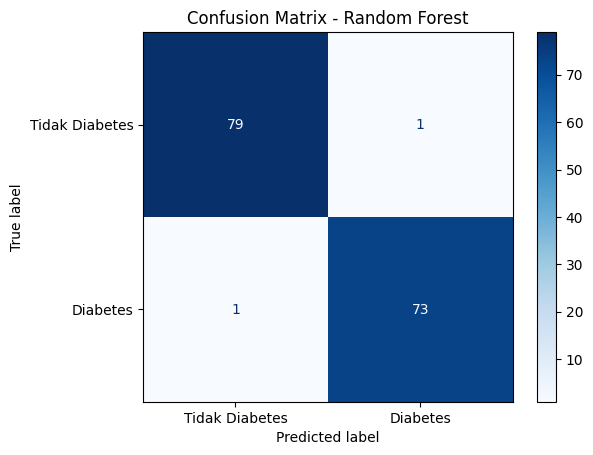

In [24]:
#@title Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Tidak Diabetes", "Diabetes"])

# Plotting confusion matrix
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

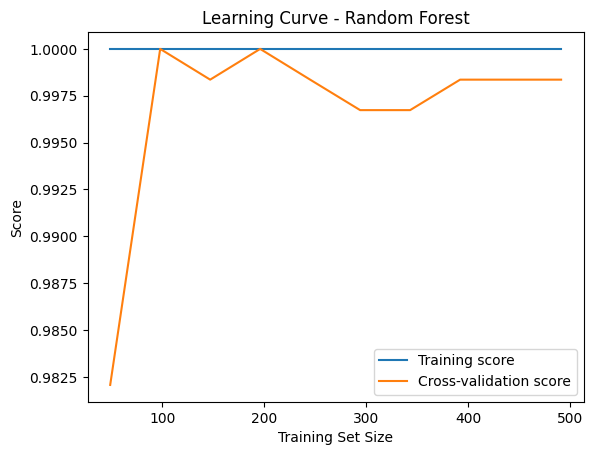

In [25]:
#@title Learning curve
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train_scaled, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plotting learning curve
plt.plot(train_sizes, train_scores_mean, label="Training score")
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score")
plt.xlabel("Training Set Size")
plt.ylabel("Score")
plt.title("Learning Curve - Random Forest")
plt.legend()
plt.show()

In [38]:
import joblib

joblib.dump(best_model, 'diabetes_model.pkl')

['diabetes_model.pkl']

In [39]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']